In [294]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [295]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [296]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [297]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [298]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [299]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)

In [300]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [301]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [302]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

    child = childP1 + childP2
    return child

In [303]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [304]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [305]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [306]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [307]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Distancia Inicial: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Distancia Final: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [308]:
cityList_A = []

for i in range(0,30):
    cityList_A.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [309]:
bestRoute_A = geneticAlgorithm(population=cityList_A, popSize=100, eliteSize=15, mutationRate=0.01, generations=200)
print("\nMejor ruta para el Problema A:")
bestRoute_A

Distancia Inicial: 2352.2076393270827
Distancia Final: 1021.3302473112745

Mejor ruta para el Problema A:


[(47,172),
 (69,180),
 (83,195),
 (58,127),
 (86,135),
 (142,162),
 (156,144),
 (173,120),
 (162,104),
 (198,90),
 (188,137),
 (173,143),
 (170,112),
 (167,124),
 (124,117),
 (125,88),
 (181,50),
 (188,40),
 (142,50),
 (137,41),
 (107,41),
 (114,53),
 (74,39),
 (83,20),
 (54,40),
 (44,20),
 (13,26),
 (37,20),
 (63,80),
 (39,120)]

In [310]:
cityList_B = []
for i in range(0, 30): 
    cityList_B.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [311]:
bestRoute_B = geneticAlgorithm(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=400)
print("\nMejor ruta para el Problema B:")
bestRoute_B

Distancia Inicial: 2533.6322794444673
Distancia Final: 2133.5548653732035

Mejor ruta para el Problema B:


[(153,105),
 (158,165),
 (76,154),
 (159,142),
 (71,73),
 (21,13),
 (25,12),
 (71,25),
 (4,190),
 (7,182),
 (52,53),
 (23,81),
 (85,187),
 (54,157),
 (6,149),
 (104,151),
 (181,130),
 (195,148),
 (154,162),
 (155,113),
 (150,110),
 (16,43),
 (58,60),
 (26,52),
 (170,1),
 (144,178),
 (164,99),
 (163,108),
 (110,87),
 (149,68)]

In [312]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.show()

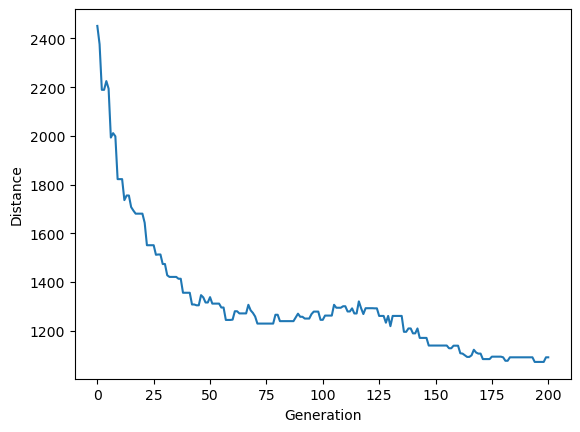

In [313]:
geneticAlgorithmPlot(population=cityList_A, popSize=100, eliteSize=15, mutationRate=0.01, generations=200)

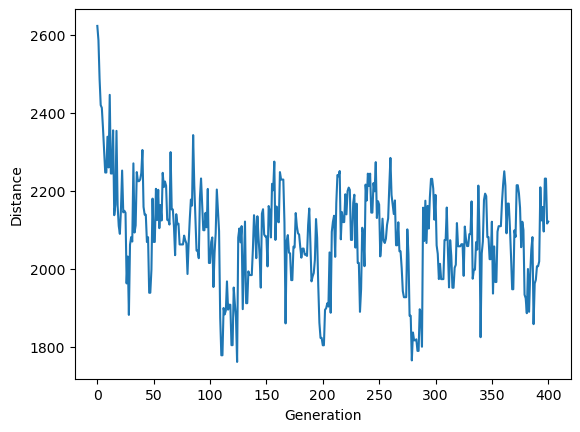

In [314]:
geneticAlgorithmPlot(population=cityList_B, popSize=100, eliteSize=20, mutationRate=0.05, generations=400)

In [315]:
def calcular_distancia_total(ruta):
    distancia_total = 0
    for i in range(len(ruta)):
        fromCity = ruta[i]
        toCity = ruta[(i + 1) % len(ruta)]  # Asegura el retorno a la ciudad de origen
        distancia_total += fromCity.distance(toCity)
    return distancia_total

In [316]:
def calcular_uso_combustible(bestRoute, eficiencia_combustible):
    return bestRoute / eficiencia_combustible

In [317]:
def calcular_tiempo_trayectoria(ruta, velocidad_promedio):
    distancia_total = calcular_distancia_total(ruta)
    tiempo_trayectoria = distancia_total / velocidad_promedio  # Tiempo = Distancia / Velocidad
    return tiempo_trayectoria

In [318]:
# Asumiendo una eficiencia de combustible de 15 km/L para el vehículo
eficiencia_combustible = 7
velocidad_promedio = 120 # Asumiendo una velocidad promedio de 60 km/h

In [319]:
# Creación de comparaciones
## Calcular tiempo de trayectoria
tiempo_trayectoria_A = calcular_tiempo_trayectoria(bestRoute_A, velocidad_promedio)
tiempo_trayectoria_B = calcular_tiempo_trayectoria(bestRoute_B, velocidad_promedio)

## Calcular la distancia y combustible total para el Problema A
distancia_total_A = calcular_distancia_total(bestRoute_A)
uso_combustible_A = calcular_uso_combustible(distancia_total_A, eficiencia_combustible)

# Calcular la distancia y bombustible total para el Problema B
distancia_total_B = calcular_distancia_total(bestRoute_B)
uso_combustible_B = calcular_uso_combustible(distancia_total_B, eficiencia_combustible)

In [320]:
#Muestra de comparaciones

##Resultados Ruta A:
print("Resultados Ruta A:")
print("Tiempo de Trayectoria A: {:.2f} horas".format(tiempo_trayectoria_A))
print("Distancia Total para el Problema A: {:.2f} km".format(distancia_total_A))
print("Uso Estimado de Combustible para el Problema A: {:.2f} L".format(uso_combustible_A))


##Resultados Ruta B:
print("\nResultados Ruta B:")
print("Tiempo de Trayectoria B: {:.2f} horas".format(tiempo_trayectoria_B))
print("Distancia Total para el Problema B: {:.2f} km".format(distancia_total_B))
print("Uso Estimado de Combustible para el Problema B: {:.2f} L".format(uso_combustible_B))



Resultados Ruta A:
Tiempo de Trayectoria A: 8.51 horas
Distancia Total para el Problema A: 1021.33 km
Uso Estimado de Combustible para el Problema A: 145.90 L

Resultados Ruta B:
Tiempo de Trayectoria B: 17.78 horas
Distancia Total para el Problema B: 2133.55 km
Uso Estimado de Combustible para el Problema B: 304.79 L
